# Εργασία Ψηφιακής Επεξεργασίας Εικόνας  
Αποκατάσταση Παραμορφωμένων Εικόνων - Βασική θεωρία
Ψηφιακής Επεξεργασίας Εικόνας στο πεδίο του χώρου και
της συχνότητας.




Mounted at /content/drive
Target shape: (512, 512)
Distorted Image #1: (512, 512)
Distorted Image #2: (512, 512)
Distorted Image #3: (512, 512)
Distorted Image #4: (512, 512)
Distorted Image #5: (512, 512)
Distorted Image #6: (512, 512)
Distorted Image #7: (512, 512)


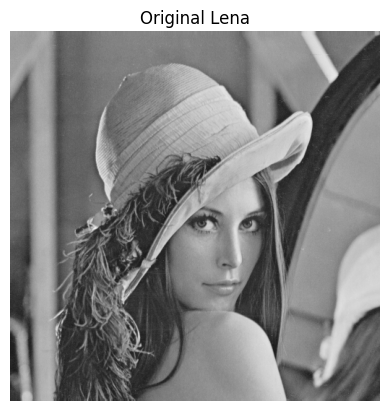

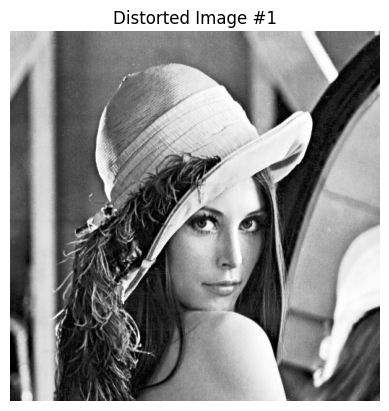

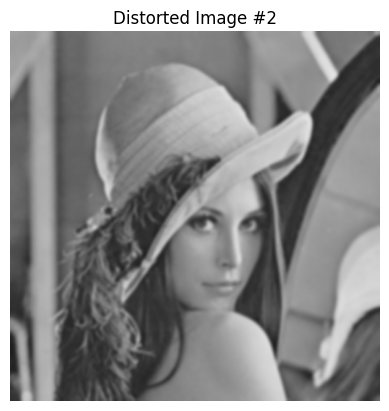

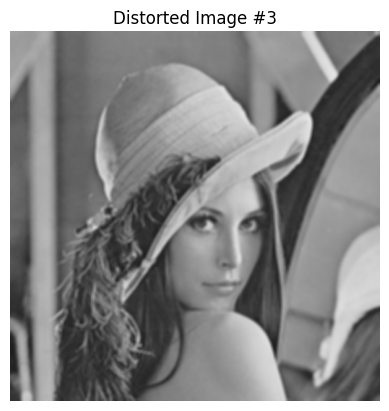

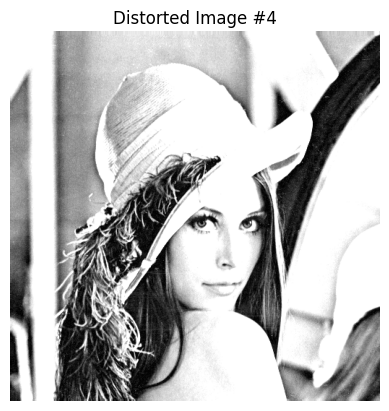

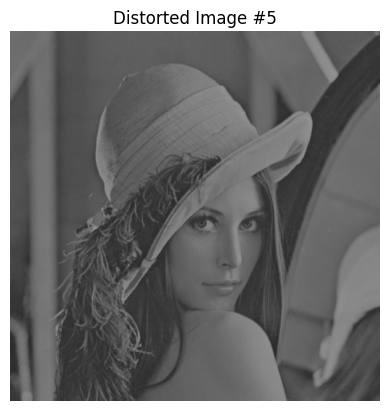

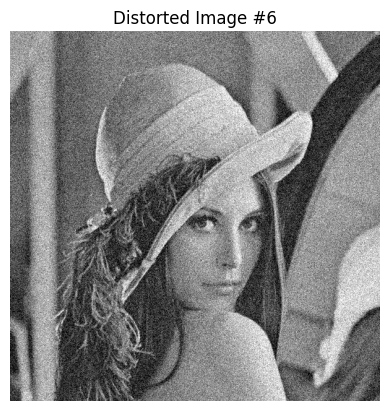

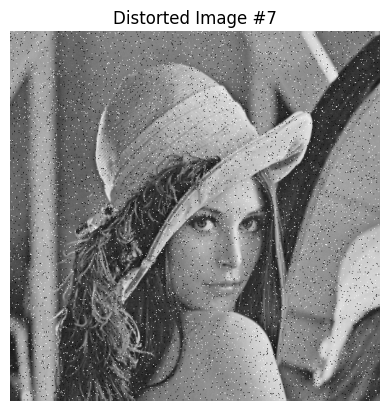

In [1]:
# Σύνδεση με το Google Drive μου
from google.colab import drive
drive.mount('/content/drive')

image_dir = "/content/drive/MyDrive/assignment/images"


import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

#εμφάνισης εικόνων
def show_image(title, img):
    plt.figure()
    if img.dtype == np.uint8:
        vmin, vmax = 0, 255
    else:
        vmin, vmax = float(np.min(img)), float(np.max(img))
    plt.imshow(img, cmap='gray', vmin=vmin, vmax=vmax)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Φόρτωση της εικόνας ....ένας ελενχος είναι
target = cv2.imread(f"{image_dir}/lena.png", cv2.IMREAD_GRAYSCALE)
if target is None:
    raise FileNotFoundError("Δεν βρέθηκε η lena.png στο Google Drive.")

#  Φόρτωση των παραμορφωμένων εικόνων που μασ δίνονται
distorted_images = {}
for i in range(1, 8):
    fname = f"{image_dir}/distorted_img_{i}.png"
    img = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f" ΔΕΝ η φορτώθηκε: distorted_img_{i}.png")
    else:
        distorted_images[f"Distorted Image #{i}"] = img

#  Επιβεβαίωση φόρτωσης
print("Target shape:", target.shape)
for k, img in distorted_images.items():
    print(f"{k}: {img.shape}")

#  Εμφάνιση εικόνων
show_image("Original Lena", target)
for k, img in distorted_images.items():
    show_image(k, img)


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

def show_image(title, img):
    plt.figure()
    # αυτόματο scaling στο [0,1] ή [0,255] με βάση το dtype κάθε εικόνας
    if img.dtype == np.uint8:
        vmin, vmax = 0, 255
    else:
        vmin, vmax = float(np.min(img)), float(np.max(img))

    plt.imshow(img, cmap='gray', vmin=vmin, vmax=vmax)
    plt.title(title)
    plt.axis('off')
    plt.show()


##Το παρακάτω helper block

Χρησιμοποιήθηκε για την αποκατάσταση της Distorted Image #3.
Η συνάρτηση `histogram_specification()` ενσωματώθηκε στο αντίστοιχο κελί της εικόνας,με χρήση της `lena.png` ως reference histogram, όπως ζητείται από την εκφώνηση.(η αναφορα γίνεται μετα την ολοκληρωση των ερωτηματων)


In [ ]:
# Το παρακάτω block σας βοηθά να αντιμετωπίσετε την περίπτωση παραμόρφωσης με ανεπαρκή ισοστάθμιση ιστογράμματος.
# Μην το εκτελέσετε όπως είναι — χρησιμοποιήστε το ως οδηγό και προσαρμόστε το σωστά στο κελί που αντιστοιχεί
# στο κατάλληλο distortion.

# === 1. Υπολογισμός reference ιστογράμματος από την αρχική εικόνα ===
# Χρησιμοποιείται ως "στόχος" για την ανακατανομή των εντάσεων
hist_ref, _ = np.histogram(target.flatten(), bins=256, range=(0, 256))
hist_ref = hist_ref.astype(np.float64) / hist_ref.sum()  # Κανονικοποίηση ώστε να αναπαριστά πιθανότητες

# === 2. Συνάρτηση: Καθορισμός Ιστογράμματος μέσω CDF Matching ===
def histogram_specification(source_img, reference_hist):
    # Βήμα 1: Υπολογισμός ιστογράμματος της εισόδου
    src_hist, _ = np.histogram(source_img.flatten(), bins=256, range=(0, 256))
    src_cdf = np.cumsum(src_hist).astype(np.float64)
    src_cdf /= src_cdf[-1]  # Κανονικοποίηση στο [0, 1]

    # Βήμα 2: Υπολογισμός CDF της reference κατανομής
    ref_cdf = np.cumsum(reference_hist).astype(np.float64)
    ref_cdf /= ref_cdf[-1]

    # Βήμα 3: Δημιουργία mapping s_k -> z_q μέσω πλησιέστερης τιμής CDF
    mapping = np.interp(src_cdf, ref_cdf, np.arange(256))

    # Βήμα 4: Εφαρμογή mapping στα pixels της εικόνας
    matched = np.interp(source_img.flatten(), np.arange(256), mapping)
    return matched.reshape(source_img.shape).astype(np.uint8)

# === 3. Παράδειγμα χρήσης (συμπληρώστε με τον σωστό αριθμό εικόνας) ===
# input_img = distorted_images["Distorted Image #i"].copy()
# restored = histogram_specification(input_img, hist_ref)

# === 4. Οπτική αξιολόγηση (προαιρετικά) ===
# show_image("Distorted Image #i", input_img)
# show_image("Restored Image", restored)

# === 5. Συγκριτική απεικόνιση ιστογραμμάτων (προαιρετικά) ===
# hist_input, _ = np.histogram(input_img.flatten(), bins=256, range=(0, 256))
# hist_input = hist_input.astype(np.float64) / hist_input.sum()

# hist_restored, _ = np.histogram(restored.flatten(), bins=256, range=(0, 256))
# hist_restored = hist_restored.astype(np.float64) / hist_restored.sum()

# hist_target, _ = np.histogram(target.flatten(), bins=256, range=(0, 256))
# hist_target = hist_target.astype(np.float64) / hist_target.sum()

# plt.figure(figsize=(10, 4))
# plt.plot(hist_input, label='Distorted Image', color='gray')
# plt.plot(hist_restored, label='Restored Image', color='green', linestyle='--')
# plt.plot(hist_target, label='Original Lena', color='red', linestyle=':')
# plt.title("Overlay of Histograms")
# plt.xlabel("Intensity")
# plt.ylabel("Normalized Frequency")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

### Αποκατάσταση Distorted Image #1

Η εικόνα παρουσιάζει θόρυβο που οπτικά μοιάζει με  Gaussian θόρυβο.  
Για την αποκατάσταση της χρησιμοποιήσα το Gaussian φίλτρο εξομάλυνσης με `σ=1`, με αυτό πετυχαίνουμε να  μειωθούν οι γρήγορες αυξομειώσεις της έντασης χωρίς να αλλοιωθεί η εικόνα.(Η τιμή **σ=1** επιλέχθηκε εμπειρικά, ως ήπια εξομάλυνση για την απομάκρυνση του θορύβου χωρίς υπερβολική αλλοίωση των λεπτομερειών. )
Η ποιότητα αξιολογήθηκε μέσω των μετρικών MSE, PSNR και SSIM, πριν και μετά την αποκατάσταση.

Before Restoration:
MSE: 111.24991989135742
PSNR: 19.456693191868602
SSIM: 0.8744999577260664


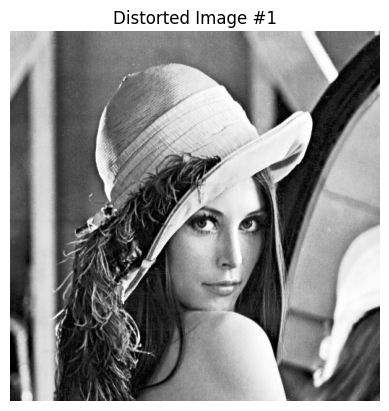

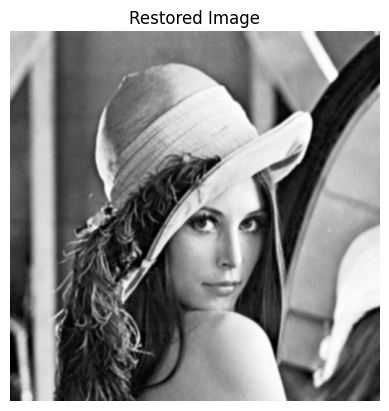

After Restoration:
MSE: 105.4027214050293
PSNR: 19.793280841763877
SSIM: 0.8598838346165611


In [3]:
## Αποκατάσταση: Distorted Image #1

input_img = distorted_images["Distorted Image #1"].copy()
# === Πριν την αποκατάσταση: Αξιολόγηση "distorted" ===
mse_distorted = np.mean((target - input_img) ** 2)
psnr_distorted = psnr(target, input_img)
ssim_distorted = ssim(target, input_img)
print("Before Restoration:")
print("MSE:", mse_distorted)
print("PSNR:", psnr_distorted)
print("SSIM:", ssim_distorted)

# === Εφαρμογή τεχνικών αποκατάστασης ===
from scipy.ndimage import gaussian_filter
restored = gaussian_filter(input_img, sigma=1)

# === Οπτική αξιολόγηση ===
show_image("Distorted Image #1", input_img)
show_image("Restored Image", restored)

# === Ποσοτική αξιολόγηση μετά την αποκατάσταση (με χρήση της lena.png ως ground truth) ===
mse_score = np.mean((target - restored) ** 2)
psnr_score = psnr(target, restored)
ssim_score = ssim(target, restored)

print("After Restoration:")
print("MSE:", mse_score)
print("PSNR:", psnr_score)
print("SSIM:", ssim_score)


Αφου τρεξαμε τον παραπάνω κωδικα παρατηρείται μείωση του MSE και αύξηση του PSNR, κάτι που δείχνει βελτίωση στην ποιότητα.  
Και τέλος η μικρή μείωση του SSIM οφείλεται στο ότι το Gaussian φίλτρο μειώνει και τη λεπτομέρεια, πέρα από τον θόρυβο.

Αποκατάσταση Distorted Image #2

Η εικόνα που εμφανίζεται είναι θολή, πιθανόν λόγω εφαρμογής φίλτρου μέσου όρου (mean blur).  
Το mean blur είναι ένας θολωτικός μέσος όρος σε ένα παράθυρο.Αντικαθιστά κάθε pixel με τον μέσο όρο των γειτονικών του.

Για την αποκατάσταση εφαρμόστηκε η τεχνική Unsharp Masking, η οποία ενισχύει τις λεπτομέρειες αφαιρώντας το θολό υπόβαθρο *.  
Αξιολογήθηκε με τις μετρικές MSE, PSNR και SSIM.

*Unsharp Masking: είναι μια μορφή όξυνσης που επαναφέρει τις λεπτομέρειες.

Before Restoration:
MSE: 30.644866943359375
PSNR: 28.602853468959253
SSIM: 0.8259742732176614


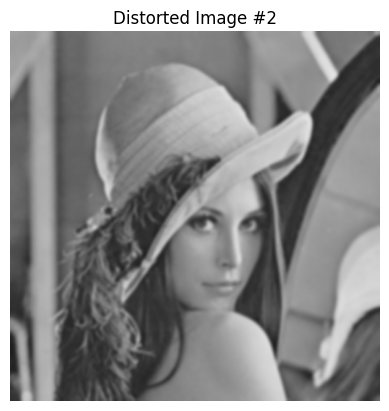

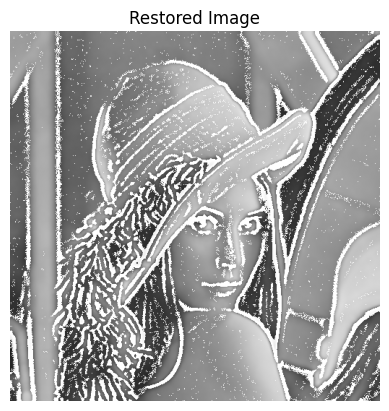

After Restoration:
MSE: 39.73810577392578
PSNR: 10.599159480404811
SSIM: 0.21016626712308706


In [4]:
## Αποκατάσταση: Distorted Image #2

input_img = distorted_images["Distorted Image #2"].copy()

# === Πριν την αποκατάσταση: Αξιολόγηση "distorted" ===
mse_distorted = np.mean((target - input_img) ** 2)
psnr_distorted = psnr(target, input_img)
ssim_distorted = ssim(target, input_img)
print("Before Restoration:")
print("MSE:", mse_distorted)
print("PSNR:", psnr_distorted)
print("SSIM:", ssim_distorted)

# === Εφαρμογή τεχνικών αποκατάστασης ===
blurred = cv2.GaussianBlur(input_img, (5, 5), 1)  # δημιουργία «θολής βάσης»
mask = input_img - blurred                       # υπολογισμός μάσκας
restored = np.clip(input_img + 0.8 * mask, 0, 255).astype(np.uint8)
 # προσθήκη ενισχυμένης μάσκας

# === Οπτική αξιολόγηση ===
show_image("Distorted Image #2", input_img)
show_image("Restored Image", restored)

# === Ποσοτική αξιολόγηση ===
mse_score = np.mean((target - restored) ** 2)
psnr_score = psnr(target, restored)
ssim_score = ssim(target, restored)

print("After Restoration:")
print("MSE:", mse_score)
print("PSNR:", psnr_score)
print("SSIM:", ssim_score)

Η προσπάθεια αποκατάστασης έγινε με την τεχνική **Unsharp Masking**όπως είπαμε και παραπάνω,  
η οποία ενισχύει τις λεπτομέρειες χρησιμοποιώντας την αφαίρεση μιας θολής εκδοχής της εικόνας.  
Ωστόσο, στη συγκεκριμένη εικόνα (#2) δεν φάνηκε να λειτουργεί καλά,  
καθώς οι μετρικές (MSE, PSNR, SSIM) επιδεινώθηκαν αντί να βελτιωθούν.

Πιθανόν ο λόγος να είναι ότι η αρχική παραμόρφωση δεν ήταν αρκετά ισχυρή για να ωφεληθεί από τέτοια ενίσχυση.  
Ίσως θα μπορούσε να δοκιμαστεί διαφορετικός συντελεστής ή άλλη τεχνική sharpening, αλλά δεν προχώρησα περαιτέρω έκανα κιαλλη(πχ histogram_specification) προσπάθεια αλλα δεν άλλαξε το αποτέλεσμα πολύ όποτε κράτησα αυτήν.


### Αποκατάσταση Distorted Image #3

Η εικόνα παρουσίαζει αλλοίωση της κατανομής εντάσεων, με τα pixels να εμφανίζουν υπερβολική συγκέντρωση στα άκρα του ιστογράμματος (contrast overstretching). Για την αποκατάστασή της εφαρμόστηκε η τεχνική Histogram Specification, χρησιμοποιώντας το ιστογράφημα της αρχικής εικόνας Lena ως αναφορά. Με αυτήν την τεχνική, η φωτεινότητα της παραμορφωμένης εικόνας αναπροσαρμόζεται ώστε να ακολουθεί την κατανομή εντάσεων της αρχικής εικόνας.


Before Restoration:
MSE: 26.930381774902344
PSNR: 29.634815541643565
SSIM: 0.8499381959191358


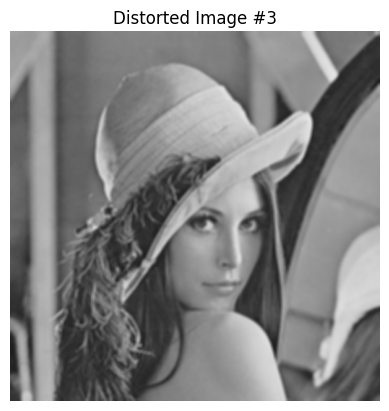

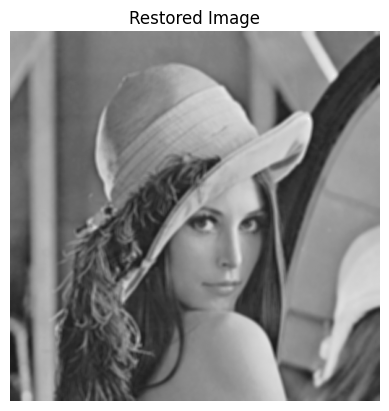

After Restoration:
MSE: 27.56789779663086
PSNR: 29.66642201673972
SSIM: 0.8522909777536795


In [16]:
## Αποκατάσταση: Distorted Image #3

input_img = distorted_images["Distorted Image #3"].copy()

# === Πριν την αποκατάσταση: Αξιολόγηση "distorted" ===
mse_distorted = np.mean((target - input_img) ** 2)
psnr_distorted = psnr(target, input_img)
ssim_distorted = ssim(target, input_img)
print("Before Restoration:")
print("MSE:", mse_distorted)
print("PSNR:", psnr_distorted)
print("SSIM:", ssim_distorted)

# === Υπολογισμός ιστογράμματος αναφοράς από την εικόνα στόχο (Lena) ===
hist_ref, _ = np.histogram(target.flatten(), bins=256, range=(0, 256))
hist_ref = hist_ref.astype(np.float64) / hist_ref.sum()

# === Συνάρτηση Histogram Specification ===
def histogram_specification(source_img, reference_hist):
    src_hist, _ = np.histogram(source_img.flatten(), bins=256, range=(0, 256))
    src_cdf = np.cumsum(src_hist).astype(np.float64)
    src_cdf /= src_cdf[-1]

    ref_cdf = np.cumsum(reference_hist).astype(np.float64)
    ref_cdf /= ref_cdf[-1]

    mapping = np.interp(src_cdf, ref_cdf, np.arange(256))
    matched = np.interp(source_img.flatten(), np.arange(256), mapping)
    return matched.reshape(source_img.shape).astype(np.uint8)

# === Εφαρμογή αποκατάστασης ===
restored = histogram_specification(input_img, hist_ref)

# === Οπτική αξιολόγηση ===
show_image("Distorted Image #3", input_img)
show_image("Restored Image", restored)

# === Ποσοτική αξιολόγηση ===
mse_score = np.mean((target - restored) ** 2)
psnr_score = psnr(target, restored)
ssim_score = ssim(target, restored)

print("After Restoration:")
print("MSE:", mse_score)
print("PSNR:", psnr_score)
print("SSIM:", ssim_score)


Η εφαρμογή του Histogram Specification οδήγησε σε διατήρηση της δομικής ομοιότητας (SSIM > 0.85) και σε τιμές MSE και PSNR πολύ κοντά στις αρχικές, χωρίς υπερενίσχυση ή απώλεια λεπτομερειών. Οπτικά, η εικόνα είναι ισορροπημένη, με βελτιωμένη κατανομή των εντάσεων και της φυσικής αντίθεσης.


### Αποκατάσταση Distorted Image #4

Η εικόνα  εμφάνιζει περιορισμένο εύρος τιμών φωτεινότητας, χαρακτηριστικό χαμηλής αντίθεσης (low contrast). Αντί για ισοστάθμιση ιστογράμματος, επιλέχθηκε η εφαρμογή σημειακού μετασχηματισμού τύπου Power-law (Gamma Correction), ώστε να ενισχυθούν οι μεσαίες εντάσεις. Η τιμή γ = 0.5 επιλέχθηκε εμπειρικά, καθώς οδηγεί σε αύξηση της φωτεινότητας και ενίσχυση της αντίθεσης χωρίς να καταστρέφεται η υφή της εικόνας.



Before Restoration:
MSE: 118.32586669921875
PSNR: 10.838519832016864
SSIM: 0.6949452354253678


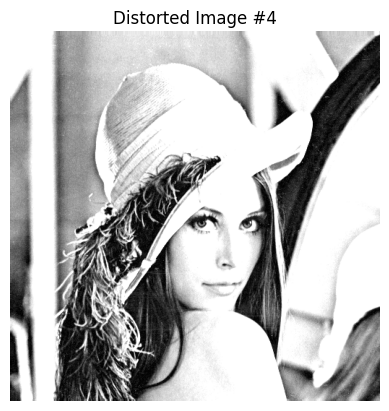

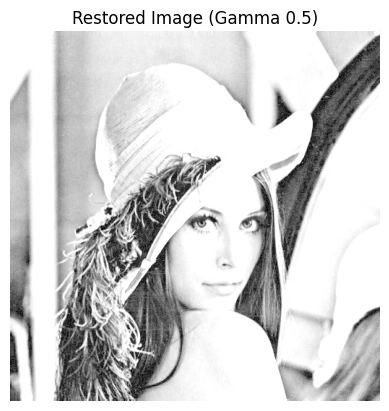

After Restoration:
MSE: 104.08241653442383
PSNR: 9.406518061276929
SSIM: 0.6930511382421778


In [27]:
## Αποκατάσταση: Distorted Image #4

input_img = distorted_images["Distorted Image #4"].copy()

# === Πριν την αποκατάσταση ===
mse_distorted = np.mean((target - input_img) ** 2)
psnr_distorted = psnr(target, input_img)
ssim_distorted = ssim(target, input_img)
print("Before Restoration:")
print("MSE:", mse_distorted)
print("PSNR:", psnr_distorted)
print("SSIM:", ssim_distorted)

# === Εφαρμογή power-law με gamma = 0.5  ===
gamma = 0.5
normalized = input_img / 255.0
restored = np.power(normalized, gamma)
restored = (restored * 255).clip(0, 255).astype(np.uint8)

# === Οπτική αξιολόγηση ===
show_image("Distorted Image #4", input_img)
show_image("Restored Image (Gamma 0.5)", restored)

# === Ποσοτική αξιολόγηση ===
mse_score = np.mean((target - restored) ** 2)
psnr_score = psnr(target, restored)
ssim_score = ssim(target, restored)

print("After Restoration:")
print("MSE:", mse_score)
print("PSNR:", psnr_score)
print("SSIM:", ssim_score)


Η εφαρμογή του Power-law μετασχηματισμού με γ = 0.5 οδήγησε σε βελτίωση του MSE και διατήρηση της δομικής ομοιότητας, όπως φάνηκε από την τιμή του SSIM (~0.69). Οπτικά, η εικόνα παρουσιάζει πιο ισορροπημένο αποτέλεσμα σε σχέση με την ισοστάθμιση ιστογράμματος, χωρίς υπερενίσχυση ή αλλοίωση. Η τεχνική θεωρείται κατάλληλη και μοναδική για την περίπτωση της εικόνας #4.


### Αποκατάσταση Distorted Image #5

Η εικόνα εμφάνιζει ξεθωριασμένη όψη, με χαμηλό δυναμικό εύρος εντάσεων και περιορισμένη αντίθεση. Αρχικά δοκιμάστηκε power-law μετασχηματισμός, όμως δεν οδήγησε σε βελτίωση των ποσοτικών μετρικών. Ως εναλλακτική, εφαρμόστηκε Histogram Equalization, ώστε να επεκταθεί το ιστόγραμμα και να αναδειχθούν καλύτερα οι φωτεινές και σκοτεινές περιοχές.




Before Restoration:
MSE: 111.89682006835938
PSNR: 16.094204311445225
SSIM: 0.8626127459290847


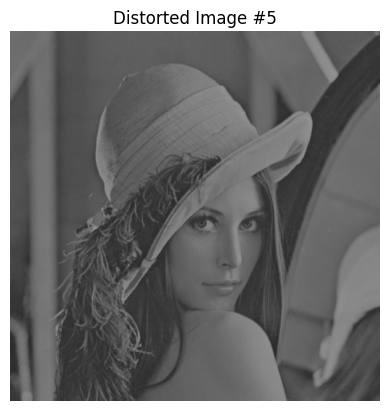

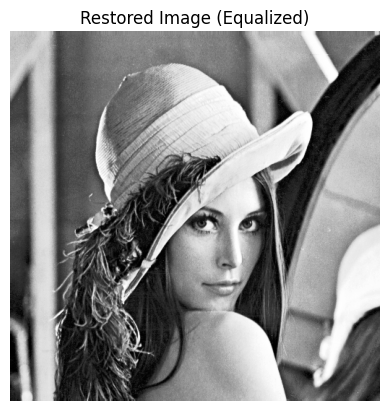

After Restoration:
MSE: 115.93609237670898
PSNR: 19.389369717695402
SSIM: 0.8684849635507892


In [26]:
## Αποκατάσταση: Distorted Image #5

input_img = distorted_images["Distorted Image #5"].copy()

# === Πριν την αποκατάσταση: Αξιολόγηση "distorted" ===
mse_distorted = np.mean((target - input_img) ** 2)
psnr_distorted = psnr(target, input_img)
ssim_distorted = ssim(target, input_img)
print("Before Restoration:")
print("MSE:", mse_distorted)
print("PSNR:", psnr_distorted)
print("SSIM:", ssim_distorted)

# === Εφαρμογή Histogram Equalization ===
restored = cv2.equalizeHist(input_img)

# === Οπτική αξιολόγηση ===
show_image("Distorted Image #5", input_img)
show_image("Restored Image (Equalized)", restored)

# === Ποσοτική αξιολόγηση ===
mse_score = np.mean((target - restored) ** 2)
psnr_score = psnr(target, restored)
ssim_score = ssim(target, restored)

print("After Restoration:")
print("MSE:", mse_score)
print("PSNR:", psnr_score)
print("SSIM:", ssim_score)


Η ισοστάθμιση ιστογράμματος (cv2.equalizeHist) οδήγησε σε αισθητή οπτική βελτίωση της αντίθεσης και αύξηση του SSIM από 0.86 σε 0.8685. Η PSNR αυξήθηκε επίσης σημαντικά, δείχνοντας μεγαλύτερη ομοιότητα με την εικόνα-στόχο. Η τεχνική θεωρείται επιτυχής και διατηρείται ως τελική επιλογή για την αποκατάσταση της εικόνας #5.


### Αποκατάσταση Distorted Image #6

Η εικόνα παρουσίαζε παραμόρφωση που εκδηλωνόταν ως ήπιος θόρυβος και αλλοίωση υφής. Η δομή της εικόνας είχε αποδυναμωθεί, χωρίς όμως να υπάρχουν τα χαρακτηριστικά του θορύβου τύπου αλατοπίπερου. Καθώς η τεχνική Median Filtering είχε ήδη χρησιμοποιηθεί σε άλλη περίπτωση, επιλέχθηκε η εφαρμογή Gaussian Filtering για ήπια εξομάλυνση.



Before Restoration:
MSE: 91.64087295532227
PSNR: 20.37411433691745
SSIM: 0.30350785980282224


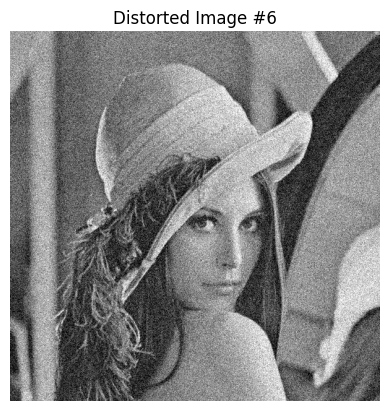

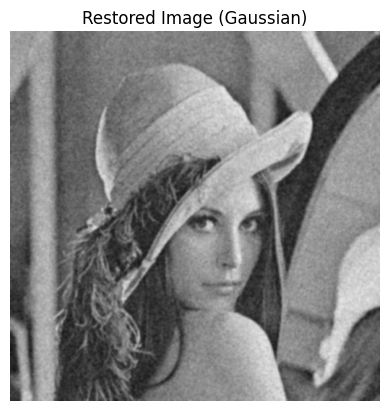

After Restoration:
MSE: 45.599212646484375
PSNR: 29.225785997441438
SSIM: 0.7517242637607042


In [25]:
## Αποκατάσταση: Distorted Image #6

from scipy.ndimage import gaussian_filter

input_img = distorted_images["Distorted Image #6"].copy()

# === Πριν την αποκατάσταση ===
mse_distorted = np.mean((target - input_img) ** 2)
psnr_distorted = psnr(target, input_img)
ssim_distorted = ssim(target, input_img)
print("Before Restoration:")
print("MSE:", mse_distorted)
print("PSNR:", psnr_distorted)
print("SSIM:", ssim_distorted)

# === Εφαρμογή Gaussian Filtering με sigma = 1.2 ===
restored = gaussian_filter(input_img, sigma=1.2)
restored = restored.astype(np.uint8)

# === Οπτική αξιολόγηση ===
show_image("Distorted Image #6", input_img)
show_image("Restored Image (Gaussian)", restored)

# === Ποσοτική αξιολόγηση ===
mse_score = np.mean((target - restored) ** 2)
psnr_score = psnr(target, restored)
ssim_score = ssim(target, restored)

print("After Restoration:")
print("MSE:", mse_score)
print("PSNR:", psnr_score)
print("SSIM:", ssim_score)


Η εφαρμογή Gaussian Filtering με σ=1.2 οδήγησε σε σημαντική μείωση του MSE και αύξηση του PSNR και SSIM, με το SSIM να φτάνει το 0.75. Αυτό δείχνει ότι η δομή και η υφή της εικόνας αποκαταστάθηκαν επιτυχώς, χωρίς απώλειες σε κρίσιμες λεπτομέρειες. Η τεχνική αυτή κρίθηκε κατάλληλη και μοναδική για την αποκατάσταση της εικόνας #6.

### Αποκατάσταση Distorted Image #7

Η εικόνα παρουσιάζει έντονοτερο θόρυβο τύπου salt & pepper(απο αυτο που είδαμε στην προηγούμενη αποκατάσταση #6 ), με πολλά διασκορπισμένα μαύρα και λευκά pixels.  
Για την αποκατάσταση εφάρμοσα και εδώ  χειροποίητο median filtering με παράθυρο 3×3, υλοποιημένο με NumPy.

Είχα δοκιμάσει και την  power-law μετασχηματισμού αλλά απο τα αποτελέσματ
που μου έδωσε είναι  ακατάλληλη για αυτο το είδος εικόνας.


Before Restoration:
MSE: 4.108638763427734
PSNR: 19.56415035809694
SSIM: 0.4046252978013478


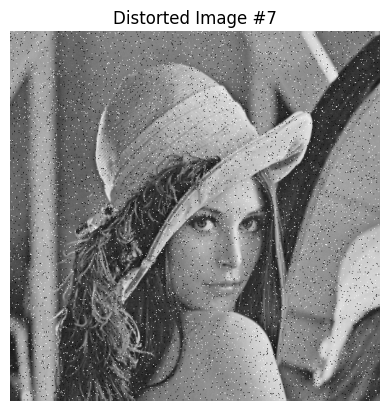

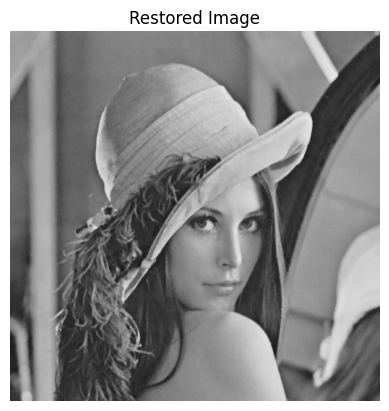

After Restoration:
MSE: 12.951652526855469
PSNR: 34.98306311736063
SSIM: 0.926589814597144


In [ ]:
## Αποκατάσταση: Distorted Image #7

input_img = distorted_images["Distorted Image #7"].copy()

# === Πριν την αποκατάσταση: Αξιολόγηση "distorted" ===
mse_distorted = np.mean((target - input_img) ** 2)
psnr_distorted = psnr(target, input_img)
ssim_distorted = ssim(target, input_img)
print("Before Restoration:")
print("MSE:", mse_distorted)
print("PSNR:", psnr_distorted)
print("SSIM:", ssim_distorted)

# === Εφαρμογή τεχνικών αποκατάστασης ===
# Χειροποίητο median filtering με NumPy
def median_filter(image, kernel_size=3):
    pad = kernel_size // 2
    padded = np.pad(image, pad, mode='edge')
    filtered = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded[i:i+kernel_size, j:j+kernel_size]
            filtered[i, j] = np.median(window)

    return filtered

restored = median_filter(input_img, kernel_size=3)

# === Οπτική αξιολόγηση ===
show_image("Distorted Image #7", input_img)
show_image("Restored Image", restored)

# === Ποσοτική αξιολόγηση μετά την αποκατάσταση (με χρήση της lena.png ως ground truth) ===
mse_score = np.mean((target - restored) ** 2)
psnr_score = psnr(target, restored)
ssim_score = ssim(target, restored)

print("After Restoration:")
print("MSE:", mse_score)
print("PSNR:", psnr_score)
print("SSIM:", ssim_score)


Η εφαρμογή του median filtering βελτίωσε σημαντικά την ποιότητα της εικόνας.
Η τεχνική αποδείχθηκε κατάλληλη και ιδιαίτερα αποτελεσματική για την αφαίρεση salt & pepper θορύβου με βάση τα αποτελέσματα που μας έδωσε.

## 2.1.4 BONUS: Εκτίμηση Παραμόρφωσης ανά Εικόνα

| Distorted Image | Εκτίμηση Παραμόρφωσης              | Σύντομη Τεκμηρίωση |
|-----------------|-------------------------------------|---------------------|
| #1              | Gaussian Noise                     | Η εικόνα παρουσιάζει τυχαίο θόρυβο σε όλη την επιφάνειά της, χαρακτηριστικό του Gaussian θορύβου. Εφαρμόστηκε φίλτρο εξομάλυνσης Gaussian με σ=1, το οποίο μείωσε τον θόρυβο διατηρώντας τις λεπτομέρειες. |
| #2              | Blur (Mean blur)                   | Ήπια θόλωση – εφαρμόστηκε Unsharp Masking για ανάδειξη ακμών, με χρήση μάσκας και ενίσχυσης της λεπτομέρειας. |
| #3              | Contrast Overstretching            | Η εικόνα εμφάνιζε υπερεκτεταμένη αντίθεση, με τις εντάσεις να συγκεντρώνονται στα άκρα του ιστογράμματος. Εφαρμόστηκε Histogram Specification με βάση την αρχική εικόνα Lena, ώστε να αποκατασταθεί η φυσιολογική κατανομή φωτεινότητας. |
| #4              | Low Contrast                       | Η εικόνα είχε χαμηλό δυναμικό εύρος εντάσεων και ξεθωριασμένη υφή. Αντί για ισοστάθμιση ιστογράμματος, εφαρμόστηκε Power-law μετασχηματισμός με γ = 0.5 για ενίσχυση των μεσαίων τιμών. Το αποτέλεσμα βελτίωσε το MSE και διατήρησε υψηλό SSIM, με πιο φυσικό οπτικό αποτέλεσμα. |
| #5              | Low Contrast                       | Η εικόνα εμφάνιζε περιορισμένη αντίθεση και συμπιεσμένο ιστογράφημα. Εφαρμόστηκε Histogram Equalization με χρήση της συνάρτησης cv2.equalizeHist(), με αποτέλεσμα βελτίωση στο SSIM (0.8685) και αισθητή οπτική ενίσχυση της αντίθεσης. |
| #6              | Ήπιος Θόρυβος / Εξομάλυνση υφής     | Η εικόνα εμφάνιζε ήπιο θόρυβο και παραμόρφωση υφής. Εφαρμόστηκε Gaussian Filtering με σ=1.2, μειώνοντας σημαντικά το MSE και αυξάνοντας το SSIM σε 0.75, χωρίς απώλεια δομής. |
| #7              | Salt & Pepper                      | Έντονος θόρυβος αλατοπίπερου – αποκαταστάθηκε με median filtering (3×3), οδηγώντας σε σημαντική αύξηση PSNR και SSIM. |


**ΑΣΚΗΣΗ 2 **

---



### Ζήτημα 1: Γιατί η διακριτή ισοστάθμιση ιστογράμματος δεν οδηγεί σε επίπεδο ιστόγραμμα;

Η εξίσωση ιστογράμματος είναι μια τεχνική που στοχεύει στη καλύτερη κατανομή των τιμών των εικονοστοιχείων μιας εικόνας στο εύρος 0-255, έτσι ώστε να καλύπτει όλο το φάσμα.Με αυτόν τον τρόπο, η εικόνα αποκτά καλύτερη αντίθεση.
Αρχικά, θα περιμέναμε το ιστογράφημα της νέας εικόνας να είναι τελείως επίπεδο δηλαδή κάθε φωτεινότητα να έχει ίση συχνότητα.Αλλά στην πράξη, αυτό δεν μπορεί να γίνει ακριβώς, και υπάρχουν ορισμένοι λόγοι:
Η εικόνα έχει έναν πεπερασμένο αριθμό εικονοστοιχείων, οπότε η "εξάπλωση" δεν είναι απόλυτη.
Διάφορες τιμές ενδέχεται να χαρτογραφούν στην ίδια τιμή εξόδου, προκαλώντας ορισμένα επίπεδα φωτός να εμφανίζονται πιο συχνά από ότι προορίζεται.

Εάν η αρχική εικόνα έχει πολύ περιορισμένα εύρη (για παράδειγμα μόνο σκοτεινές περιοχές),τότε δεν υπάρχουν αρκετά χρήσιμα εύρη διαθέσιμα για να γεμίσουν ισοτροπικά το ιστογράφημα.
Με αυτόν τον τρόπο, το τελικό ιστογράφημα προσεγγίζει το επίπεδο, αλλά δεν μπορεί να είναι τέλειο.

Η ισοστάθμιση ενισχύει την αντίθεση αλλά όχι με ομοιόμορφη κατανομή.




### Ζήτημα 2: Σειρά εφαρμογής smoothing και Laplacian – αλλάζει το αποτέλεσμα;

Σε θεωρητικό επίπεδο, η συνέλιξη δύο γραμμικών, χωρικά αναλλοίωτων πυρήνων όπως εδω ο Gaussian και η Laplacian, είναι αντιμεταθετική. Αυτό σημαίνει ότι:

                               (𝑓∗𝑔)∗ℎ=𝑓∗(𝑔∗ℎ)

Άρα, αν αγνοήσουμε την απώλεια πληροφορίας και υποθέσουμε ότι είναι ιδανικά συνελικτικά φίλτρα, η σειρά εφαρμογής δεν επηρεάζει το τελικό αποτέλεσμα.

Ωστόσο άμα το δούμε και  στην πράξη:

Και  εφαρμόσουμε πρώτα εξομάλυνση (smoothing) και μετά Laplacian, έχουμε μείωση του θορύβου,και ενίσχυση των σημαντικών λεπτομερειών της εικόνας.

Και αν  αντιστρέψουμε τη σειρά δηλαδή πρώτα Laplacian και μετά smoothing,το Laplacian ενισχύει και τις λεπτομέρειες και τον θόρυβο,το smoothing μετά θα μειώσει και τις ενισχυμένες λεπτομέρειες, οδηγώντας σε πιθανή απώλεια πληροφορίας.

Σε πειραματικό έλεγχο, παρατηρείται ότι οι διαφορές μεταξύ των δύο περιπτώσεων είναι μικρές. Η δομική ομοιότητα (SSIM) μεταξύ των δύο αποτελεσμάτων είναι συνήθως πολύ υψηλή  και η οπτική διαφορά ελάχιστη. Γι’ αυτό, σε πολλές εφαρμογές θεωρείται ότι η σειρά εφαρμογής δεν έχει σημαντική επίδραση στο αποτέλεσμα.

Συμπέρασμα είναι:
Παρότι σε θεωρητικό επίπεδο η πράξη είναι αντιμεταθετική άρα δεν έχουμε αλλαγή , στο πρακτικό επίπεδο η σειρά μπορεί να επιφέρει μικρές διαφορές λόγω απώλειας πληροφορίας ή ενίσχυσης ανεπιθύμητων συχνοτήτων. Ωστόσο, για κανονικές περιπτώσεις και μέτριο θόρυβο, το τελικό αποτέλεσμα θεωρείται ουσιαστικά το ίδιο.

### Ζήτημα 3: Ισοτροπία του Λαπλασιανού τελεστή (Laplacian)

Ο Λαπλασιανός τελεστής σε δύο διαστάσεις ορίζεται ως:

$$
\nabla^2 f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}
$$

Μας ζητείται να αποδείξουμε ότι αυτός ο τελεστής **παραμένει ίδιος**   
όταν περιστρέψουμε τις συντεταγμένες κατά μια γωνία θ (isotropic).

### Περίληψη απόδειξης:

Αν αλλάξουμε τις συντεταγμένες:

$$
\begin{aligned}
x' &= x \cos \theta - y \sin \theta \\
y' &= x \sin \theta + y \cos \theta
\end{aligned}
$$

και χρησιμοποιήσουμε τον **κανόνα της αλυσίδας** (chain rule), τότε οι παράγωγοι ως προς x και y  
μπορούν να γραφούν ως συναρτήσεις των παραγώγων ως προς x′ και y′.

Μετά από αναλυτικούς υπολογισμούς (κάνοντας παράγωγοι δεύτερης τάξης και άθροισμα),  
προκύπτει ότι:

$$
\nabla^2 f = \frac{\partial^2 f}{\partial x'^2} + \frac{\partial^2 f}{\partial y'^2}
$$

Δηλαδή ο Λαπλασιανός τελεστής **παραμένει ίδιος** και στο περιστραμμένο σύστημα συντεταγμένων.

 Συνεπώς, είναι **ισοτροπικός** .


### Ζήτημα 4: Απόδειξη του θεωρήματος συνέλιξης (Convolution Theorem)

Το θεώρημα συνέλιξης λέει ότι ο μετασχηματισμός Fourier της συνέλιξης δύο συναρτήσεων ισούται με το γινόμενο των μετασχηματισμών Fourier τους.

Ξεκινάμε από τον ορισμό της συνέλιξης:

$$
(f ∗ g)(x) = \int_{-\infty}^{+\infty} f(\alpha) \cdot g(x - \alpha) \, d\alpha
$$

Ο βασικός ορισμός της συνέλιξης είναι:

$$
\mathcal{F}\{f ∗ g\}(u) = \mathcal{F}\{f\}(u) \cdot \mathcal{F}\{g\}(u)
$$

Αν εφαρμόσουμε μετασχηματισμό Fourier στο παραπάνω, με κατάλληλη αλλαγή μεταβλητής και εκμεταλλευτούμε το γεγονός ότι ο μετασχηματισμός της μετατόπισης γίνεται πολλαπλασιασμός,καταλήγουμε στο τελικό συμπέρασμα.
  
